<div style="max-width: 214px; margin-left: auto; margin-left: 0;"><img style="float: left;" src="https://d39j63uul3zf0p.cloudfront.net/default/0001/12/thumb_11269_default_big.png" /></div>
<div style="float: left; font-size: large; text-align: left; padding-top: 5px; line-height:120%">
    <div style="font-weight: 500;">
        <span style="color:rgb(0,104,180);"></span><span style="color:rgb(0,50,109);">Optimization for Machine Learning</span> <br>Exercise Sheet 01
    </div>
    <span style="font-size: 0.9em;">Lionel Tondji | AMMI summer term 24</span>
</div>


<div>
    <p style="text-align: center; font-size: 1.1em;"><b>Topic:</b> <i>First experiences with Ridge Regression</i>
</div>
<hr>

In *Ridge Regression* we want to find a linear relationship in data points $(x_i,y_i)_{i=1,\dots,n}$, where $x_i \in \mathbb{R}^d$ is the underlying data and $y_i \in \mathbb{R}$ is the scalar observation. With the *data matrix* $$X^T = \begin{pmatrix} x_1^T \\ \vdots \\ x_n^T \end{pmatrix} \in \mathbb{R}^{n \times d} \; \text{and} \; Y = \begin{pmatrix} y_1 \\ \vdots \\ y_n \end{pmatrix} \in \mathbb{R}^{n}$$
we want to find the linear relationship
$$Y \approx X^T \beta.$$
Since the data might not fit exactly, we use regularization (with some chosen parameter $\lambda \geq 0$) and try to minimize
$$\min_{\beta \in \mathbb{R}^d} \frac{1}{n} \sum_{i=1}^n (x_i^T \beta - y_i)^2 + \lambda \sum_{j=1}^d \beta_j^2,$$
respectively more compactly
$$\min_{\beta \in \mathbb{R}^d} \frac{1}{n} \left\| X^T \beta - Y \right\|_2^2 + \lambda \left\| \beta \right\|_2^2.$$

In this exercise sheet we will explore briefly how to use gradient descent
$$\beta_{k+1} = \beta_{k} - \eta \nabla f(\beta_{k})$$
to find the minimizer. More details will be discussed later in the lecture.

## Assignment 1 - Calculating the Gradient *(5 Points)*

As you probably think or know, gradient descent relies on gradients of the function, we want to minimize. Hence the first assignment is to calculate the gradient of
$$\frac{1}{n} \sum_{i=1}^n (x_i^T \beta - y_i)^2 + \lambda \sum_{j=1}^d \beta_j^2 = \frac{1}{n} \left\| X^T \beta - Y \right\|_2^2 + \lambda \left\| \beta \right\|_2^2$$
with respect to $\beta$.

Ans.   

Let $f(\beta) = \frac{1}{n} \Vert X^T β - Y \Vert^2_2 + \lambda \Vert \beta \Vert^2_2$. $f$ is convex and differentiable. Hence, $\beta^\ast$ minimizes $f(\beta)$ if and only if $∇_{\beta}f(\beta^\ast)=0$.
Now,
\begin{align}
\nabla_{\beta}f(β) &= \frac{1}{n} ∇_{\beta}\left[\left( X^T\beta - Y \right)^T \left(X^T\beta -Y\right)\right] + \lambda ∇_{\beta}\left(\beta^T β\right)\\
& = \frac{2} n X(X^Tβ-Y) + 2λ β
\end{align}
$\nabla_{\beta}f(β^\ast)=0 ⟺  \frac{2} n X(X^Tβ^\ast-Y) + 2λ β^\ast=0 ⟺ \beta^\ast \stackrel{(\#)}{=} \left( X X^T + \lambda n I \right)^{-1}XY$.

$(\#):$ The matrix $(XX^T + λ nI)$ is invertible, since $XX^T$ is psd,  that is $ 0\leq v^T X X^T v = \Vert X^Tv \Vert^2,\; ∀ v\in \mathbb{R}^d$.

## Assignment 2 - Behaviour of Gradient Descent *(5 Points)*

In this exercise we want to observe the behaviour of *gradient descent*. Therefore we are calculating the iterations $\left(\beta_k\right)_k$ for two different step sizes.

We set the regularization parameter $\lambda = 0$ (no regularization) and let $X^T = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$ and $Y = \begin{pmatrix} 2 \\ 3 \end{pmatrix}$.

Calculate the iterates $\beta_0, \dots, \beta_5$ with the gradient descent formula
$$\beta_0 = 0 \in \mathbb{R}, \beta_{k+1} = \beta_k - \eta \nabla_\beta f(\beta_k)$$
with $f = \left(\frac{1}{n} \left\| X^T \cdot - Y \right\|_2^2 + \lambda \left\| \cdot \right\|_2^2\right)$ with the constant step size $\eta = 0.2$.

Describe your observation. Does the same happen for every choice of $\eta > 0$?

Ans.

In this case,  $n=2$, $\eta = .2$ and $
\beta_{k+1} = \beta_k - \eta X(X^T \beta -Y), \; ∀ k.
$
Now, \begin{align*}
k=1, \beta_1 &=1.6\\
k=2, \beta_2 &=  1.6\\
k=3, \beta_3& = \beta_2 = 1.6\\
k=4, β_4 &= \beta_3 = 1.6\\
k=5, β_5 &= β_4=1.6
\end{align*}


No, it doesn't happen for all $\eta$. Indeed, taking $\eta=1$ we have:
\begin{align*}
k=0, \beta_0 &= 0\\
k=1, \beta_1 &=8\\
k=2, \beta_2 &=  -24\\
k=3, \beta_3& = 104\\
k=4, β_4 &= -408\\
k=5, β_5 &= 1640
\end{align*}
Hence:
$$
 β_1\neq \beta_2 \neq \beta_3 \neq \beta_4 \neq β_5.
$$
Moreover, with this choice of $\eta$, the sign of $\beta_k$ alternates from $ \;\; +\;$ to $\;- \;$, having $\;+\;$ for $k=2j$ and  $ \; - \;$  for $k=2j+1$, with $j\in \mathbb{N}$.

## Assignment 3 - Programming Gradient Descent for Ridge Regression *(5 Points)*

Our first practical exercise is programming the *gradient descent algorithm* with constant step sizes for our *ridge regression example*. Fill the gaps in the code and run the following cell to observe the algorithm perform.

In [162]:
import numpy as np

In [218]:
def gradient_descent(X, Y, lambda_reg, eta, max_iter = 1000):
  # Params:
  #   X (np.array): data matrix of shape (dimension, number of data points)
  #   Y (np.array): observations
  #   lambda_reg (float):  regularization parameter
  #   max_iter (int):   maximum number of iterations to be performed
  # Returns
  #   solution, iterates

  # TODO: Implement gradient descent for ridge regression

  #  Compute beta_optimal:
  d, n = X.shape


  beta = np.zeros((d,1))
  iterates = np.zeros((max_iter,1))

  for i in range(max_iter):
    beta_old = beta

    # Compute gradient
    grad_f = (2/n)*(X@X.T@beta_old - X@Y) + 2*lambda_reg*beta_old

    # Update rule:
    beta = beta_old - eta* grad_f

    #Update iterates
    iterates[i] = beta

    if np.sum((beta_old - beta)**2) < 1e-20:
      break

  return beta, iterates

In [219]:
X = np.array([[1,2]]) # matrix
Y = np.array([[2], [3]]) # observations

# Parameters
lambda_reg = 0.0
eta = 0.01

solution, iterates = gradient_descent(X,Y, lambda_reg, eta)
print('The best approximate solution is', solution)

The best approximate solution is [[1.6]]


Run the following cell and run different combinations of *lambda_reg* and *eta* to observe the behaviour of the algorithm.



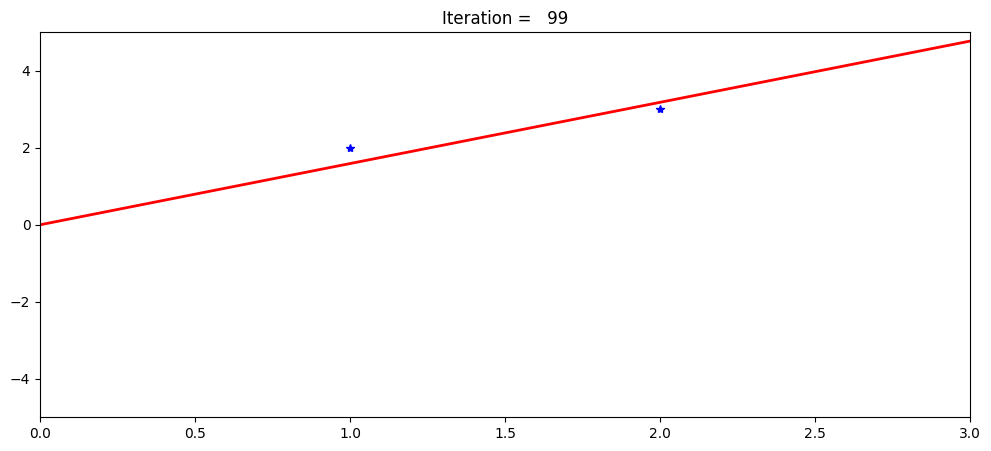

In [220]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,1,1)

# set up the subplots as needed
ax1.set_xlim((0, 3))
ax1.set_ylim((-5, 5))

# create objects that will change in the animation
line1, = ax1.plot([], [], 'r', lw=2)
pt1, = ax1.plot([], [], 'b*', lw=2)

def drawframe(n):
    txt_title = ax1.set_title('')
    x = np.linspace(0, 3, 1000)
    y = iterates[n]*x
    line1.set_data(x, y)
    pt1.set_data(np.transpose(X), Y)
    txt_title.set_text('Iteration = {0:4d}'.format(n))
    return (line1,pt1)

anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

HTML(anim.to_html5_video())